In [11]:
#1.데이터 가져오기
from sklearn.datasets import load_diabetes

diabetes=load_diabetes()

df_x=diabetes.data
df_y=diabetes.target

#2.모델에 입력할 데이터 준비하기 
print(df_x.shape)
print(df_y.shape)

(442, 10)
(442,)


In [14]:
#1-1. diabetes.data 10개 특성 확인 
for i,feature_name in enumerate(diabetes.feature_names):
  print(f'feature {i+1} : {feature_name}')

#2.pandas check
import pandas as pd
import numpy as np
#numpy로 변환 
df_x=np.array(diabetes.data)
df_y=np.array(diabetes.target)

#data=diabetes.data
#colums=diabetes.feature_names

df = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)
df['target']= diabetes.target
df.corr()

feature 1 : age
feature 2 : sex
feature 3 : bmi
feature 4 : bp
feature 5 : s1
feature 6 : s2
feature 7 : s3
feature 8 : s4
feature 9 : s5
feature 10 : s6


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
age,1.000000,0.173737,0.185085,0.335428,0.260061,0.219243,-0.075181,0.203841,0.270774,0.301731,0.187889
sex,0.173737,1.000000,0.088161,0.241010,0.035277,0.142637,-0.379090,0.332115,0.149916,0.208133,0.043062
bmi,0.185085,0.088161,1.000000,0.395411,0.249777,0.261170,-0.366811,0.413807,0.446157,0.388680,0.586450
bp,0.335428,0.241010,0.395411,1.000000,0.242464,0.185548,-0.178762,0.257650,0.393480,0.390430,0.441482
s1,0.260061,0.035277,0.249777,0.242464,1.000000,0.896663,0.051519,0.542207,0.515503,0.325717,0.212022
s2,0.219243,0.142637,0.261170,0.185548,0.896663,1.000000,-0.196455,0.659817,0.318357,0.290600,0.174054
s3,-0.075181,-0.379090,-0.366811,-0.178762,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697,-0.394789
s4,0.203841,0.332115,0.413807,0.257650,0.542207,0.659817,-0.738493,1.000000,0.617859,0.417212,0.430453
s5,0.270774,0.149916,0.446157,0.393480,0.515503,0.318357,-0.398577,0.617859,1.000000,0.464669,0.565883
s6,0.301731,0.208133,0.388680,0.390430,0.325717,0.290600,-0.273697,0.417212,0.464669,1.000000,0.382483


In [16]:
#x는 train 데이터와 y는 test 데이터로 분리하기

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=42)

print("train sh",x_train.shape,x_test.shape)
print("test sh ",y_train.shape,y_test.shape)

train sh (353, 10) (89, 10)
test sh  (353,) (89,)


In [17]:
#model 준비 

#입력 데이터 개수에 맞는 가중치 W와 b를 준비해주세요.- colums = features 1~10, data fram = data 1

w = np.random.rand(10)
b = np.random.rand(1)


#모델 함수를 구현해주세요.

def model(x,w,b):
    predicitions = 0
    for i in range(10):
        predicitions += x[:,i]*w[i]
    predicitions += b
    return predicitions

In [20]:
#손실함수 구현 -MSE로 구현 
def MSE(x, b):
#mse= ((x - b)**2).mean()
    return ((x - b)**2).mean()
def loss(x, w, b, y):
  predictions = model(x, w, b)
  Loss = MSE(predictions, y)
  return Loss

In [33]:
#gradient 함수 구현 (기울기)

def gradient(x, w, b, y):
    N = len(y)
    y_predictions = model(x, w, b)
    dw = 1/N * 2 * x.T.dot(y_predictions - y)
    db = 2 * (y_predictions - y).mean()
    return dw, db
  

In [34]:
#8.하이퍼 파라미터인 학습률 설정하기
Learningrate = 0.01


In [38]:
#9.모델 학습하기 

losses_s = []
iter_n = 500000

for i in range(1, iter_n):
    dw, db = gradient(x_train, w, b , y_train)
    w -= Learningrate * dw
    b -= Learningrate * db
    L = loss(x_train,w,b,y_train)
    losses_s.append(L)
    print(w,b)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
[  41.7715359  -240.42043918  555.93145115  343.32735077 -231.95764141
  -29.44439351 -151.8797091   176.31390746  468.8490721    53.67515829] [151.30986772]
[  41.77153448 -240.42044009  555.93144573  343.3273529  -231.95793447
  -29.44416808 -151.8795724   176.31395673  468.84918185   53.67515614] [151.30986774]
[  41.77153307 -240.42044099  555.93144031  343.32735503 -231.95822753
  -29.44394265 -151.8794357   176.314006    468.84929159   53.675154  ] [151.30986775]
[  41.77153165 -240.4204419   555.93143488  343.32735716 -231.95852059
  -29.44371723 -151.87929899  176.31405527  468.84940134   53.67515186] [151.30986777]
[  41.77153023 -240.42044281  555.93142946  343.32735929 -231.95881365
  -29.4434918  -151.87916229  176.31410454  468.84951109   53.67514972] [151.30986778]
[  41.77152882 -240.42044372  555.93142403  343.32736142 -231.95910671
  -29.44326637 -151.87902559  176.31415381  468.84962083   53.67514758] [151.3098678]
[  41.7715274  -2

KeyboardInterrupt: ignored

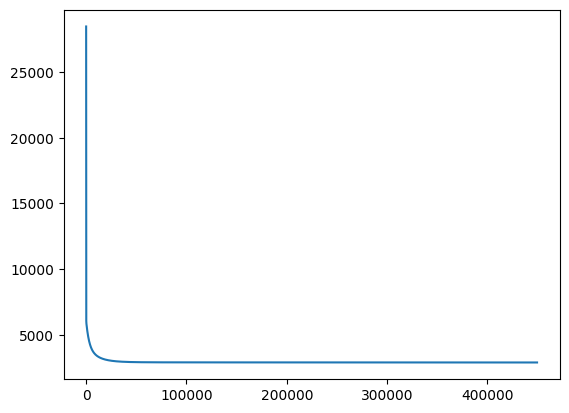

In [37]:
import matplotlib.pyplot as plt
plt.plot(losses_s)
plt.show()

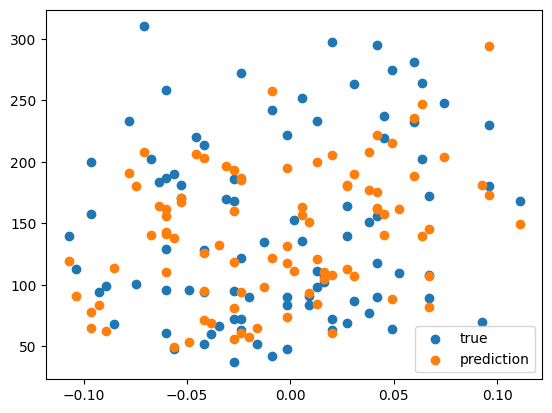

mse:2885.891148397628


In [40]:
prediction = model(x_test, w, b)
mse = loss(x_test, w, b, y_test)
plt.scatter(x_test[:, 0], y_test, label="true")
plt.scatter(x_test[:, 0], prediction, label="prediction")
plt.legend()
plt.show()
print("mse:{}".format(mse))